In [1]:
import pandas as pd
import numpy as np 

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.subplots import make_subplots
from IPython.display import Image
import plotly.figure_factory as ff
import ipywidgets as wid
import re 
from scipy import special
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
py.offline.init_notebook_mode(connected= True)

# Content:

## 1- Load Data


## 2- Exploratory Analysis
***General Exploration***

    what is happening?

***diagnostc***

    why is it happening?
    




## 3- Save Data



===================================

***
## 1- ***Load Data***
***

In [2]:
p14 = pd.read_csv('p_period 14-21')
p18 = pd.read_csv('p_period 18-21')
gk = pd.read_csv('goolkeepars')
gk21 = gk[gk['year'] == 2021]
p14.drop('index', axis=1, inplace=True)
p18.drop('index', axis=1, inplace=True)


***
# 2- ***Exploratory Analysis***
***

### EDA on Saudi Professional League players Statistics
#### Objectives:
Exploratory data anlysis on Saudi Professional League players stats dataset.
Learn and apply data visualizatiosn techniques using plotly's data visualization library.
1. Introduction

The Saudi Professional League, also known as the SPL League is the top division of association football in the Saudi Arabian league system. From 2013 to 2019, it was known as the Abdul Latif Jameel League, or Dawry Jameel, as it was sponsored by Abdul Latif Jameel.
The first season of competition was the 1976–77 season, Al Hilal is the most successful team, holding 18 titles in its history and most recently winning the title in 2021–22.

 1.1 The Saudi League

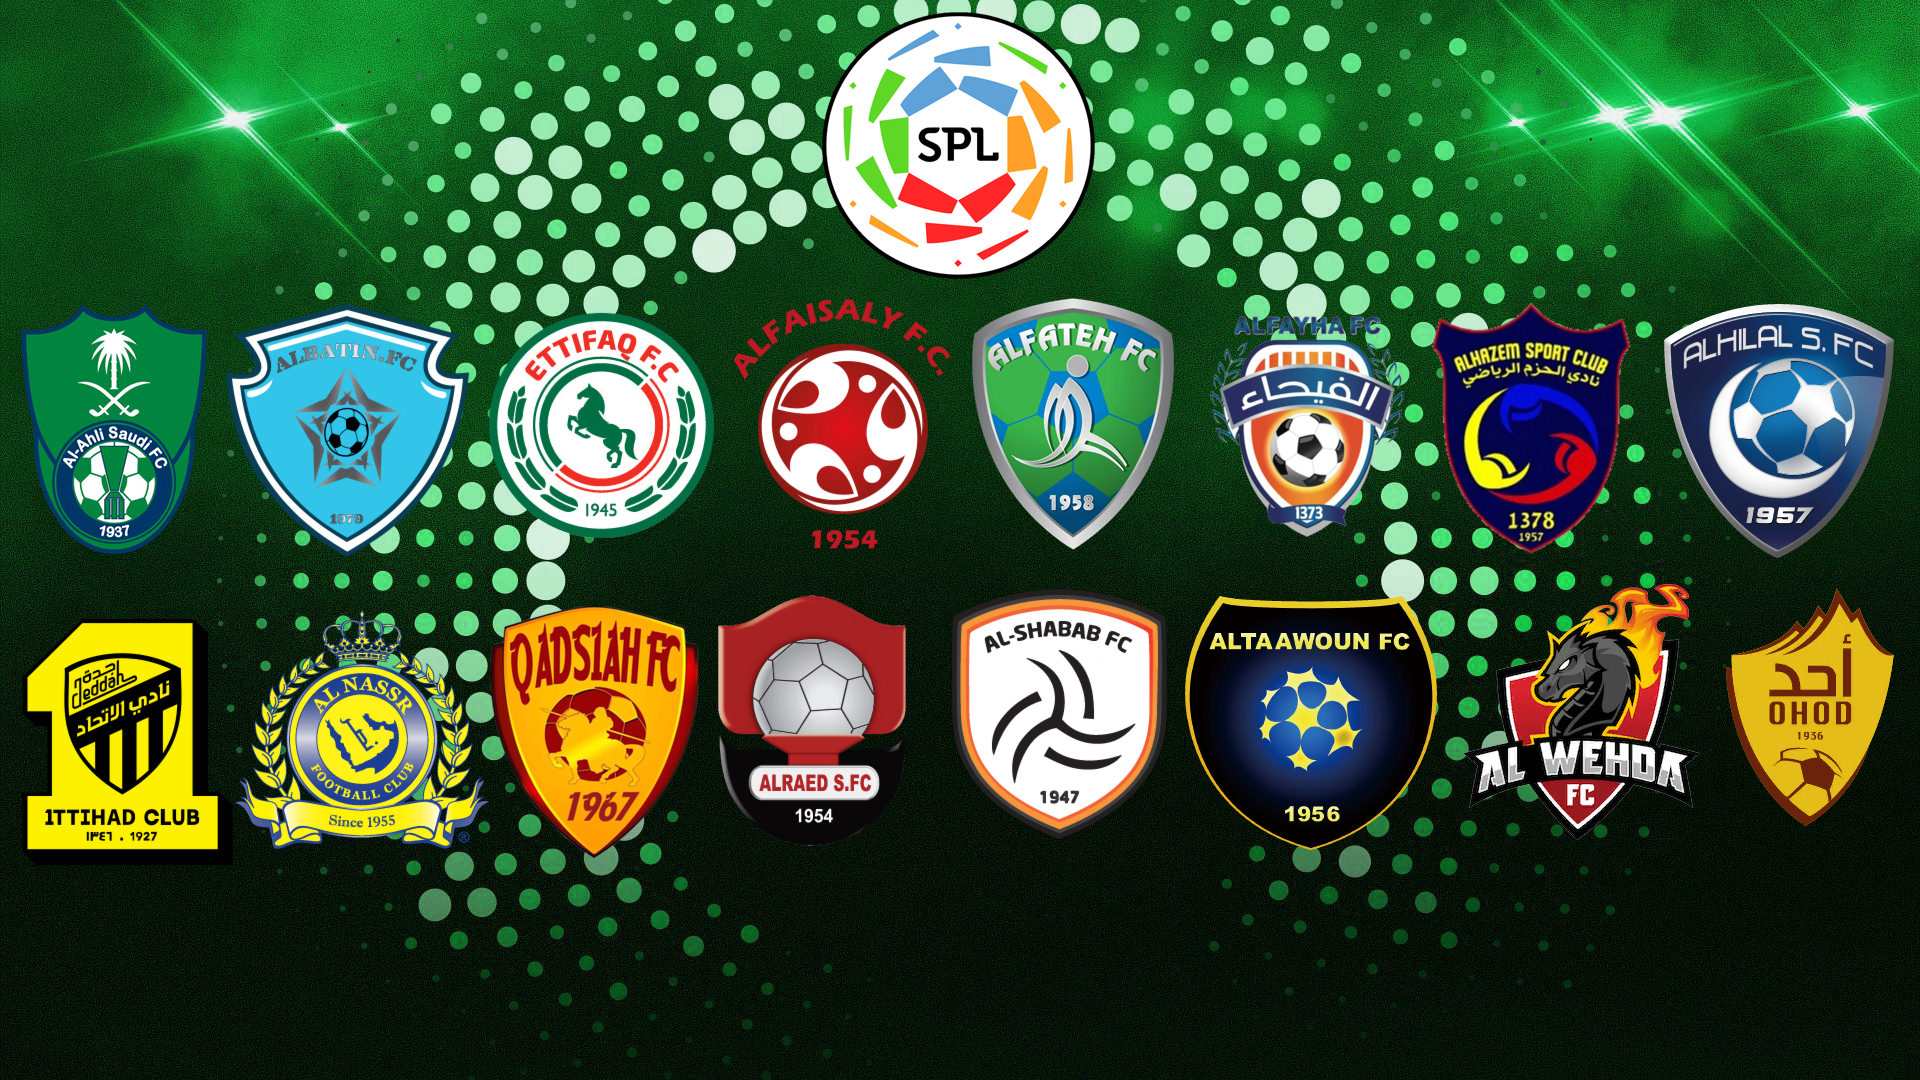

In [3]:
Image("Saudi-Professionals-League.jpg")

In [4]:
print(p14.shape)
p14.head(2)

(3719, 42)


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,index.1,MP.1,Min.1,Mn/MP,Min%,90s.1,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,year
0,1,Malek AlAbadalmanam,KSA,F,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.0,0.49,0.49,0.49,0,22,735.0,33.0,27.2,8.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,2021
1,2,Saleh AlAbbas,KSA,M,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,1,9,247.0,27.0,9.1,2.7,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,2021


In [5]:
p18 = p18.drop(['90s.1','Gls.2','PK.1','PKatt.1','Born.1','MP.1','90s.2'], axis=1)
p21 = p18[p18['year'] == 2021]
print(p18.shape)
p18.head(2)


(1991, 53)


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Min.1,Mn/MP,Min%,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,Fls,Fld,Off,Crs,Int,TklW,OG,year
0,1,Malek AlAbadalmanam,KSA,F,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.0,0.49,0.49,0.49,24,13,54.2,2.94,1.59,0.17,0.31,735.0,33.0,27.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,27,12,3,1,1,1,0,2021
1,2,Saleh AlAbbas,KSA,M,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.0,0.00,0.00,0.00,6,1,16.7,2.19,0.36,0.00,0.00,247.0,27.0,9.1,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,5,7,1,1,1,1,0,2021


In [6]:
print(gk.shape)
gk.head(2)

(283, 27)


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,year
0,1,Waleed Abdullah,KSA,GK,Al-Nassr,35.0,1986.0,20,19,1649,18.3,20.0,1.09,52.0,37,71.2,13.0,1.0,5.0,6,31.6,6,5,0,1,0.0,2021
1,2,Nawaf AlAqidi,KSA,GK,Al-Ta'ee,21.0,2000.0,7,7,630,7.0,5.0,0.71,25.0,20,80.0,5.0,1.0,1.0,3,42.9,0,0,0,0,13.3,2021


***
#### ***General Exploration***
- period 18-21
- period 18-21
- goolkeepars stats
***

## Nation and postion

I) Countries most represented in the EPL:

In any league it is normal to have more home-grown players than foreign palyers and the SPL is no different.

summary :
- Overall: 1st BRA, 2nd MAR, 3rd ALG
- Goalkeepers: 1st ALG, 2nd BOR, 3rd AUS
- Defenders: 1st BRA, 2nd ALG, 3rd EGY
- Midfielders: 1st BRA, 2nd MAR, 3rd TUN
- Forwards: 1st BRA, 2nd MAR, 3rd SYR

In [7]:
fig = px.pie(p14,
             values='MP',
             names='Nation',template='plotly_white',
             title='Countries represented in the PSL by number of appearances',
             )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='<b> Nr. of MP per country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )
fig.show()

In [8]:
fig = px.sunburst(p14, 
                   path=['Pos', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Players position by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

In [9]:
df = p18.groupby(['Player','Squad','Pos'])['MP'].sum().reset_index()

II) Players Appearances (nr. games):

Longevity, versatility, quality of the player & the squad and playing position are major factors for number of appearances.

Most of the appearances come from defence and midfield position. No surprise here. If the most common line-ups/systems (4-4-2, 4-5-1, 3-5-2, 4-3-3) are averaged they would look like in the graph below. Usually midfielders are versatile and can play in defence or in attack if needed. So they constitute the majority of a given squad.

Summary most appearances
Goalkeeper: Cassio, 115
Defender: Igor Rossi, 108
Midfielder: [Mhammed AlFuhaid, Sultan Fahran], 109
Forward: Bafetimbi Gomis, 106

In [10]:
fig = px.bar(df, x="Pos", y="MP",color='Squad',
             hover_data=["Player"],
             width=750, height=600,)
fig.update_layout(
             template='plotly_dark',
             title='<b>Players appearance by position<b>',
             titlefont={'size':24})
fig.show()

In [11]:
fig = px.bar(p18, y="Squad", x="MP",color='Pos',
             hover_data=["Player"],
             width=750, 
             height=600,
             )
fig.update_layout(
             template='plotly_dark',
             title='<b>Appearance by club<b>',
             titlefont={'size':24},
)
fig.show()

## Age

Goalkeepers and defender are relatively older than thier mid-field and attacking colleagues. The defence line (including goalkeepers) is widely regarded as the area where more of a wise-head/cool-headed than a lightning fast leg is need. No harm if a defender is fast, there are many of them. But most defenders mature with age. Being an older defender is not a bad thing.

Summary:

The yougest squad is AlFateh
AlFayha are the oldest group of players
The min, median and max ages are 16, 26.8 and 40 years



In [12]:
age_avg = p18['Age'].mean()
df = p18[p18['year'] == 2021]

fig = px.violin(p18, y="Age", x="Pos", box=True,
                title='<b> Players Age distribution by position (avg. age dotted line)<b>',
                width=600,height=400,template='simple_white')
fig.add_shape( 
    type="line", line_color="blue", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=age_avg, y1=age_avg, yref="y"
)
iplot(fig)

fig = px.box(p18, y="Squad", x="Age",
            title='<b>Players Age distribution by club (avg. age dotted line)<b>',
            width=750,height=750,template='simple_white')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
iplot(fig)

fig = px.box(df, y="Squad", x="Age",
            title='<b>Players Age distribution by club in 2021 (avg. age dotted line)<b>',
            width=750,height=750,template='simple_white')
fig.add_shape( 
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)

## Players Stats By Playing Position

## Goalkeepers

One of the key stats for goalkeepers is the much coveted clean sheet (conceeding zero goals in a game). Although this stat is not entierly dependent on the performance/ability of the goalkeeper only (a solid defence-line infront of a goalkeeper always helps), this metric shows how good a goal keeper is. Other important qualities of a goalkeeper are:

- Clean sheets
- Saves
- Penalties saved
- Punches
- High Claims
- Catches

In [13]:

gk21.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,year
0,1,Waleed Abdullah,KSA,GK,Al-Nassr,35.0,1986.0,20,19,1649,18.3,20.0,1.09,52.0,37,71.2,13.0,1.0,5.0,6,31.6,6,5,0,1,0.0,2021
1,2,Nawaf AlAqidi,KSA,GK,Al-Ta'ee,21.0,2000.0,7,7,630,7.0,5.0,0.71,25.0,20,80.0,5.0,1.0,1.0,3,42.9,0,0,0,0,13.3,2021
2,3,Nawaf AlAqidi,KSA,GK,Al-Nassr,21.0,2000.0,3,3,270,3.0,4.0,1.33,8.0,5,62.5,1.0,1.0,1.0,0,0.0,1,1,0,0,0.0,2021


In [14]:

head = 5
df1=gk21.sort_values(by='CS', ascending=False).head(head)
df2=gk21.sort_values(by='Saves', ascending=False).head(head)
df3=gk21.sort_values(by='GA', ascending=False).head(head)
df4=gk21.sort_values(by='PKsv', ascending=False).head(head)

df11=gk21.sort_values(by='CS%', ascending=False).head(head)
df12=gk21.sort_values(by='Save%', ascending=False).head(head)
df13=gk21.sort_values(by='GA90', ascending=False).head(head)
df14=gk21.sort_values(by='PKatt', ascending=False).head(head)

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Clean sheets', 'Clean sheets pc','Saves','Saves pc',
                    'Gool Ag', 'Gool Ag90','PKsv', 'PKatt'),
    horizontal_spacing = 0.12,
    vertical_spacing = 0.075)

fig.add_trace(go.Bar(
                y=df1["Player"], 
                x=df1['CS'],
                hovertext=df1['Squad'],
                orientation='h'),
                row=1, col=1)

fig.add_trace(go.Bar(
                y=df2["Player"], 
                x=df2['Saves'],
                hovertext=df2['Squad'],
                orientation='h'),
                row=2, col=1)

fig.add_trace(go.Bar(
                y=df3["Player"], 
                x=df3['GA'],
                hovertext=df3['Squad'],
                orientation='h'),
                row=3, col=1)

fig.add_trace(go.Bar(
                y=df4["Player"], 
                x=df4['PKsv'],
                hovertext=df4['Squad'],
                orientation='h'),
                row=4, col=1)


fig.add_trace(go.Bar(
                y=df11["Player"], 
                x=df11['CS%'],
                hovertext=df11['Squad'],
                orientation='h'),
                row=1, col=2)

fig.add_trace(go.Bar(
                y=df12["Player"], 
                x=df12['Save%'],
                hovertext=df12['Squad'],
                orientation='h'),
                row=2, col=2)

fig.add_trace(go.Bar(
                y=df13["Player"], 
                x=df13['GA90'],
                hovertext=df13['Squad'],
                orientation='h'),
                row=3, col=2)

fig.add_trace(go.Bar(
                y=df14["Player"], 
                x=df14['PKatt'],
                hovertext=df14['Squad'],
                orientation='h'),
                row=4, col=2)

fig.update_traces(marker_color= ['rgb(110,102,250)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)',], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b> Top goalkeepers state<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray',
                  #plot_bgcolor='lightgray',
                 )
fig.show()

In [15]:
fig = px.sunburst(gk, 
                   path=['Squad', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Players Appearance by country <b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=28, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

fig = px.sunburst(gk21, 
                   path=['Squad', 'Nation'], 
                   values='MP', template='plotly_white',
                 )
fig.update_layout(title_text='<b>Goolkeepers Appearance by country in 2021<b>', 
                  title_x=0.5, 
                  titlefont=dict(color='black', 
                            size=22, 
                            family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                
                 )
fig.show()

## Defenders
In a game of footall (in fact in any game where a draw is possible) if you can not win the game then do not lose it. That means defend well and do not concede a goal. For that to happen derenders play a huge part. Good defenders are able to read the game very well and sense where the danger is in time. They know when to join the party (attacking) or sit back and defend. Although they are rare to find, there are defenders who can do more than their own job by assisting goals and scoring themselves as well. Let's see who are the best defenders at doing their job and who are contributing more than they are needed to.

Extra info: Most expensive defender in the EPL:

Harry Maguire (Leicester City to Manchester United) - €87million
Virgil van Dijk (Southampton to Liverpool) - €84.65 million
Joao Cancelo (Juventus to Manchester City) - €65 million
Contrary to the transfer fees, big Virgil is the best defender in the list, if not in the world (of course my opinion)

In [16]:
df21 = p21[p21['Pos'] == 'D']
df21.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Min.1,Mn/MP,Min%,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,Fls,Fld,Off,Crs,Int,TklW,OG,year
3,4,Ayoub Abdellaoui,ALG,D,Al-Ettifaq,28.0,1993.0,22,19,1598,17.8,0,0,0,0,0,4,0,0.0,0.00,0.00,0.0,0.00,11,4,36.4,0.62,0.23,0.0,0.0,1598.0,73.0,59.2,19,82.0,14.0,3,13.0,0,0.95,19.0,25.0,-6.0,-0.34,-0.26,23,20,1,22,21,11,0,2021
4,5,Saud Abdulhamid,KSA,D,Al-Hilal,22.0,1999.0,13,10,970,10.8,0,2,0,0,0,2,0,0.0,0.19,0.19,0.0,0.19,3,0,0.0,0.28,0.00,0.0,0.0,970.0,75.0,35.9,10,88.0,9.0,3,31.0,0,2.77,29.0,6.0,23.0,2.13,1.51,20,15,0,43,7,24,0,2021
5,6,Saud Abdulhamid,KSA,D,Al-Ittihad,22.0,1999.0,8,8,720,8.0,0,0,0,0,0,5,0,0.0,0.00,0.00,0.0,0.00,1,0,0.0,0.12,0.00,0.0,0.0,720.0,90.0,26.7,8,90.0,8.0,0,0.0,0,2.00,17.0,7.0,10.0,1.25,0.20,11,10,1,27,12,5,0,2021


In [17]:
defenders_attr =['Gls', 'CrdY','G+A', 'onGA','Int','90s','CrdR', 'onG','+/-90', 'TklW']
# top=5
# defenders_attr =['Tackles', 'Tackle success'Interceptions' %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
#                  'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won','Successful 50/50s', 'Aerial battles won'] 
# for atr in defenders_attr:
#     text = 5
#     df = data_38app[data_38app["Position"] == 'Defender'].sort_values(by=atr, ascending=False).head(top)
#     fig = px.bar(df, x="Name", 
#                  y=atr,
#                  color='Club',
#                  hover_name=None,
#                  title="Defender defensive ability: Top {} {} ".format(text, atr.lower()))
#     fig.update_layout(autosize=False, width=1000, height=500)
#     iplot(fig)


top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'onG','90s', 'onGA','Int','+/-90','CrdY', 'G+A','CrdR', 'TklW'),
    )


df = df21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = df21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = df21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = df21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = df21.sort_values(by='Int', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Int'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = df21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = df21.sort_values(by='CrdY', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['CrdY'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = df21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = df21.sort_values(by='CrdR', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['CrdR'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = df21.sort_values(by='TklW', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['TklW'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Defender Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

## Midfielders
As it's often called mid-field is the engine-room of a football team. Mid-fielders dictate the tempo of the game, they help their attacking or defending team mates depending on the situation of their team is in. Their ability to thread in an incisive pass or their awarness to sense danger before their defending colleagues are in trouble are crucial qualities of a good mid-fielder. All great teams past and present had/have a couple world-class mid-fielders in them. Below some of these attributes are summerized

In [18]:
mf21 = p21[p21['Pos'] == 'M']
mf21.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Min.1,Mn/MP,Min%,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,Fls,Fld,Off,Crs,Int,TklW,OG,year
1,2,Saleh AlAbbas,KSA,M,Al-Faisaly,27.0,1993.0,9,1,247,2.7,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,6,1,16.7,2.19,0.36,0.0,0.0,247.0,27.0,9.1,1,55.0,0.0,8,24.0,12,0.22,2.0,5.0,-3.0,-1.09,-0.87,5,7,1,1,1,1,0,2021
2,3,Hamad AlAbdan,KSA,M,Al-Hazem,21.0,2000.0,8,3,298,3.3,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,6,2,33.3,1.81,0.60,0.0,0.0,298.0,37.0,11.0,3,67.0,0.0,5,19.0,2,1.00,1.0,5.0,-4.0,-1.21,-0.35,3,0,0,2,1,2,0,2021
7,8,Nawaf AlAbed,KSA,M,Al-Shabab,31.0,1990.0,13,7,622,6.9,1,2,1,0,0,1,0,0.14,0.29,0.43,0.14,0.43,10,2,20.0,1.45,0.29,0.1,0.5,622.0,48.0,23.0,7,76.0,1.0,6,15.0,8,1.85,13.0,5.0,8.0,1.16,0.81,11,13,0,13,5,4,0,2021


In [19]:
top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'Ast','G+A','SoT%','G/Sh','G/SoT','90s','+/-90', 'onG', 'onGA'),
    )


df = mf21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = mf21.sort_values(by='Ast', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Ast'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = mf21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = mf21.sort_values(by='SoT%', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['SoT%'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = mf21.sort_values(by='G/Sh', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/Sh'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = mf21.sort_values(by='G/SoT', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/SoT'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = mf21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = mf21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = mf21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = mf21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfielder Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

In [20]:

top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Mn/Sub', 'PPM','On-Off', 'Off','Fls','Crs','CrdY', 'CrdR','Int', 'TklW'),
    )


df = mf21.sort_values(by='Mn/Sub', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Mn/Sub'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = mf21.sort_values(by='PPM', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['PPM'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = df21.sort_values(by='On-Off', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['On-Off'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = mf21.sort_values(by='Off', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Off'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = mf21.sort_values(by='Fls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Fls'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = mf21.sort_values(by='Crs', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Crs'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = mf21.sort_values(by='CrdY', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['CrdY'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = mf21.sort_values(by='CrdR', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['CrdR'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = mf21.sort_values(by='Int', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Int'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = mf21.sort_values(by='TklW', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['TklW'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfielder Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

## Forwards
Goals, goals and goals:
Winning a game is the ultimate goal of the beautiful game. Scoring more goals that your opponent will do just that. We all watch football and enjoy when the team we support or our favorite team scores gaol/s. And enjoy the moment. Some would argue that goals just for the sake of goals are meaningless without attractive, entertaining attacking football. But goals goals are that wins you games. Below are the goals machines in the SPL.


In [21]:
fw21 = p21[p21['Pos'] == 'F']
fw21.head(3)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Min.1,Mn/MP,Min%,Starts.1,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,Fls,Fld,Off,Crs,Int,TklW,OG,year
0,1,Malek AlAbadalmanam,KSA,F,Al-Fayha,23.0,1998.0,22,8,735,8.2,4,0,4,0,0,3,0,0.49,0.00,0.49,0.49,0.49,24,13,54.2,2.94,1.59,0.17,0.31,735.0,33.0,27.2,8,68.0,2.0,14,14.0,2,1.32,7.0,4.0,3.0,0.37,0.64,27,12,3,1,1,1,0,2021
8,9,Mazen Abo Shararah,KSA,F,Damac,30.0,1991.0,18,5,445,4.9,0,1,0,0,0,0,1,0.00,0.20,0.20,0.00,0.20,8,1,12.5,1.62,0.20,0.00,0.00,445.0,25.0,16.5,5,63.0,0.0,13,10.0,3,1.33,2.0,6.0,-4.0,-0.81,-0.73,12,17,2,11,4,4,0,2021
9,10,Vincent Aboubakar,CMR,F,Al-Nassr,29.0,1992.0,23,19,1671,18.6,9,4,9,0,0,0,0,0.48,0.22,0.70,0.48,0.70,53,27,50.9,2.85,1.45,0.17,0.33,1671.0,73.0,61.9,19,81.0,9.0,4,33.0,1,1.83,31.0,25.0,6.0,0.32,-1.08,16,19,4,7,2,2,0,2021


In [22]:
top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05, 
    vertical_spacing = 0.075, 
    subplot_titles=('Gls', 'Ast','G+A','SoT%','G/Sh','G/SoT','90s','+/-90', 'onG', 'onGA'),
    )


df = fw21.sort_values(by='Gls', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['Gls'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = fw21.sort_values(by='Ast', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['Ast'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = fw21.sort_values(by='G+A', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G+A'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)  

df = fw21.sort_values(by='SoT%', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['SoT%'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)

df = fw21.sort_values(by='G/Sh', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/Sh'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)

df = fw21.sort_values(by='G/SoT', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['G/SoT'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)

df = fw21.sort_values(by='90s', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Player"], 
             y=df['90s'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)
             
df = fw21.sort_values(by='+/-90', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['+/-90'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = fw21.sort_values(by='onG', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onG'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)

df = fw21.sort_values(by='onGA', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Player"], 
             y=df['onGA'],
             #color='Club',
             #hover_name=None),
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Forward Qualities<b>', 
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False, 
                  width=1300, 
                  height=1500,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
fig.show()

In [23]:
fig = px.pie(fw21,
             values='Gls',
             names='Nation',
             title='<b>Player of which country score the most goals? <b>',
             width=550, height=550,
             )
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  showlegend= False,
                 )
iplot(fig)

## Other Statistics

4.1 Goal distribution

Summary:

Forwards score more goals (obvious)
Right-footed goals are dominant
Defenders love to head
The big hitters are Machester City, Liverpool and Tottenham
The new boys (Leeds United have the fewest goals scored)
Crystal Palace defenders have the best goal-scoring defenders

In [24]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['Gls.1'],
    name='gools pc',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['Ast.1'],
    name='Ast pc',
   marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['G+A'],
    name='Gool & Ast pc',
   marker_color='lightseagreen'
))

fig.update_layout(barmode='group',)# xaxis_tickangle=-45)
fig.update_layout(title_text="<b>Goal distribution by club<b>",
                  titlefont={'size': 24, 'family': 'Courier'},
                  width=900,
                  height =500,
                  template='plotly_dark'
                 )

iplot(fig)

In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['CrdY'],
    name='yellow cards',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=p18['Squad'],
    y=p18['CrdR'],
    name='red cards',
   marker_color='lightsalmon'
))

fig.update_layout(barmode='group',)# xaxis_tickangle=-45)
fig.update_layout(title_text="<b>Goal distribution by club<b>",
                  titlefont={'size': 24, 'family': 'Courier'},
                  width=900,
                  height =500,
                  template='plotly_dark'
                 )

iplot(fig)

***
# ***Save Data***
***

In [28]:
top_teamsall = p18[(p18.Squad == 'Al-Hilal') | (p14.Squad == 'Al-Ittihad') | (p14.Squad == 'Al-Nassr') | (p14.Squad == 'Al-Shabab') | (p14.Squad == 'Al-Raed') | (p14.Squad == 'Al-Fateh') | (p14.Squad == 'Al-Taawoun') | (p14.Squad == 'Al-Faisaly') | (p14.Squad == 'Al-Ahli') | (p14.Squad == 'Al-Fayha')]


In [29]:
top_teamsall.to_csv('top_teemAll', index=False)